# Solution to exercises in seminar 2

### Exercise - Gaussian white noise
<font color='red'>Questions</font>:
- How does the ACF and PACF looks like for the white noise process?
- Simulate Gaussian white noise and check its ACF and PACF.

White noise - variables are independent and identically distributed with a mean of zero. It does not contain any information that would help in estimation.
$ y_t = e_t, $ where $e_t\sim N(0,1)$

In [32]:
library('tseries')
library('forecast') 
set.seed = 42
series = rnorm(100)

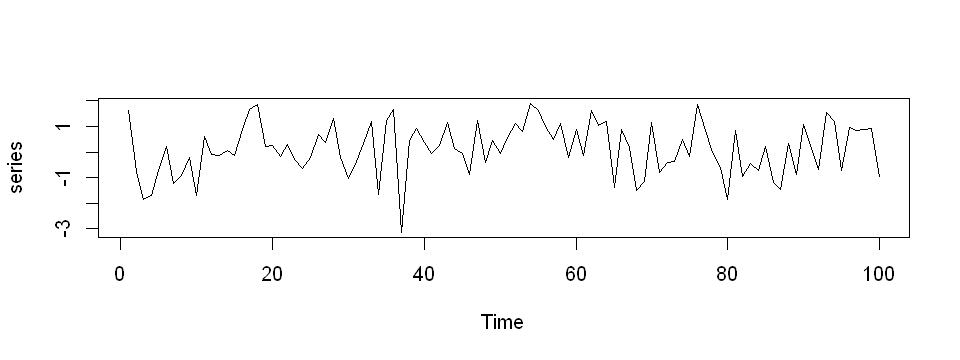

In [7]:
#plotting the time series
options(repr.plot.width=8, repr.plot.height=3) # set the plot size
ts.plot(series)

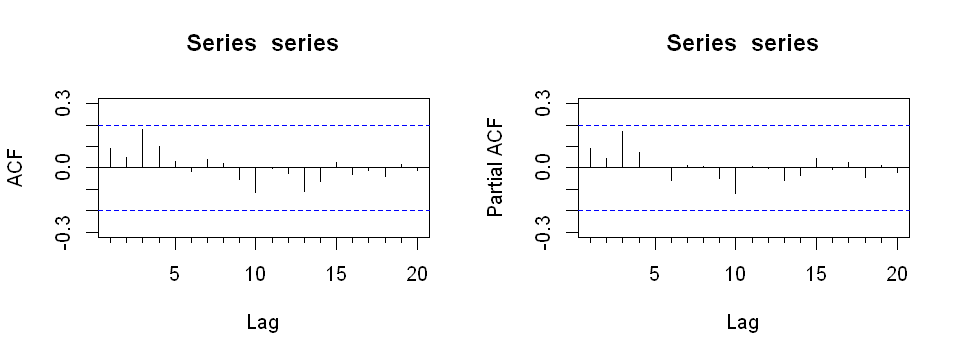

In [8]:
options(repr.plot.width=8, repr.plot.height=3) # set the plot size
par(mfrow=c(1,2))
Acf(series)
Pacf(series)

### Exercise - ADF test

<font color='red'>Question:</font>
- Investigate power of the ADF test. Simulate 1000 times Gaussian white noise process of length 50 and look at the rejection rate at the 5% significance level.

In [9]:
library(tseries) # needed for the adf.test function

In [10]:
# generate gaussian white noise once:
set.seed(50)
series = rnorm(50)

#look at first five observations
series[0:5] 


[1]  0.54966989 -0.84160374  0.03299794  0.52414971 -1.72760411

In [11]:
# check adf test for this time series:
test_result = adf.test(series, k=0) # specify the AR order, zero for the simplest Dickey Fuller test
test_result

Warning message in adf.test(series, k = 0):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  series
Dickey-Fuller = -6.6491, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [12]:
# if the p value is small we will get a warning
# to suppress it, we can use:
test_result = suppressWarnings(adf.test(series, k=0))

In [13]:
# check what can we find from this test
attributes(test_result)

$names
[1] "statistic"   "parameter"   "alternative" "p.value"     "method"     
[6] "data.name"  

$class
[1] "htest"

In [14]:
# get the p-value from the adf test
test_result$p.value

[1] 0.01

In [15]:
# compare to 0.05 and check whether the null hypothesis is rejected:
test_result$p.value < 0.05

[1] TRUE

In [16]:
# add all of this into a for loop and collect true/false for each we perform the test on simulated times series
TT=1000
a=array() # we will add the true or false to this array

for (t in 1:TT) {
    series = rnorm(50)
    test_result = suppressWarnings(adf.test(series, k=0))
    a[t] = test_result$p.value<0.05
}

In [17]:
#the null hypothesis (of unit root) was rejected in 
sum(a)

[1] 1000

In [18]:
# out of 
length(a)

[1] 1000

In [14]:
# there is quite a difference in results depending on parameter k

### Exercise - time series stationarity
<font color='red'>Question:</font> 
Perform the basic analysis of the series by yourself.

- plot the time series, ACF and PACF
- stationarity?
- transformations?

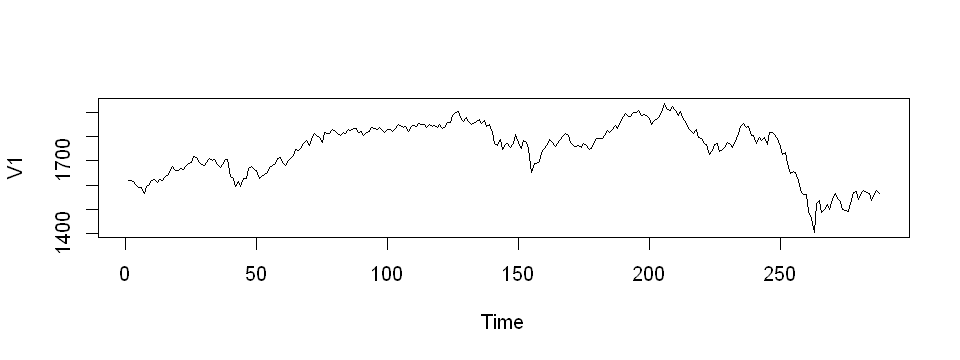

In [19]:
library('tseries')   #Time Series Analysis and Computational Finance 
library('forecast') #Forecasting Functions for Time Series and Linear Models 
library('repr') #Serializable Representations 

options(repr.plot.width=8, repr.plot.height=3)
rm(list = ls())
data <- read.table("PX50_2007_2008.txt")
data <- as.matrix(data) 
plot.ts(data)

#### solution:

In [20]:
head(data)

V1
1618.3
1617.9
1614.2
1599.9
1590.9
1589.3


In [21]:
# looking at the time series of prices:

In [22]:
# summary statistics
summary(data)

# there are different functions how to obtain summary statistics
# we would probably like to include variance, skewness and kurtosis 

# library(Hmisc) 
# describe(data)

       V1      
 Min.   :1405  
 1st Qu.:1672  
 Median :1771  
 Mean   :1747  
 3rd Qu.:1832  
 Max.   :1936  

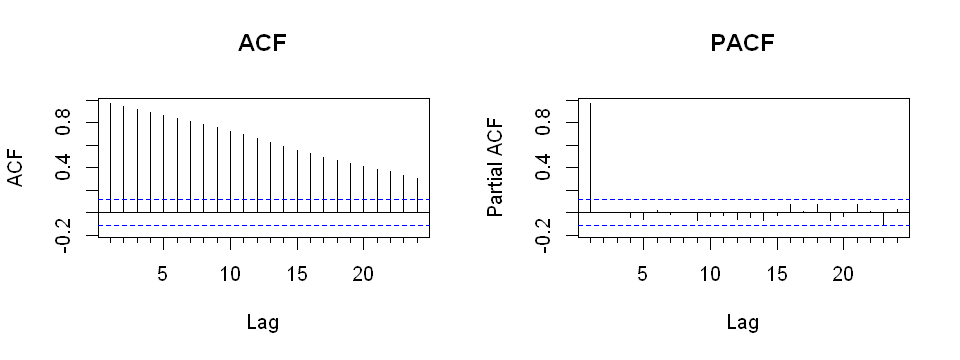

In [24]:
# ACF and PACF of the time series (price of the index)
par(mfrow = c(1,2))
Acf(data, main = "ACF")
Pacf(data, main = "PACF")

In [25]:
# transformations: log returns
returns <- diff(log(data))

In [26]:
head(returns)

V1
-0.0002472035
-0.0022895341
-0.0088983506
-0.0056412335
-0.0010062261
-0.0152161688


In [27]:
summary(returns)

       V1            
 Min.   :-0.0567315  
 1st Qu.:-0.0071768  
 Median : 0.0003281  
 Mean   :-0.0001109  
 3rd Qu.: 0.0078406  
 Max.   : 0.0808362  

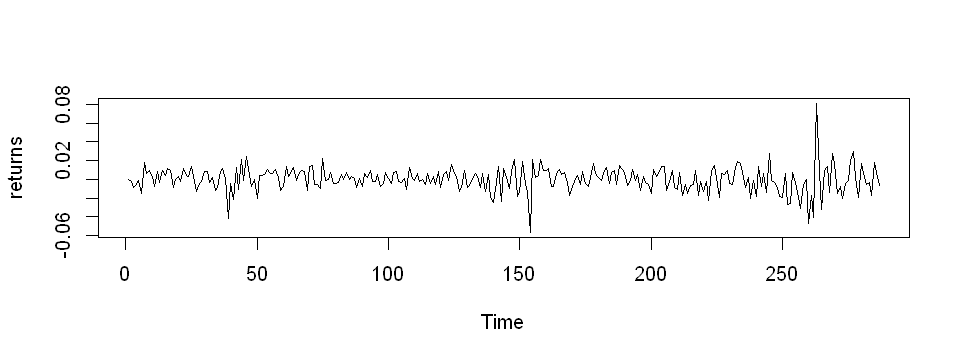

In [28]:
# plot the returns
ts.plot(returns)

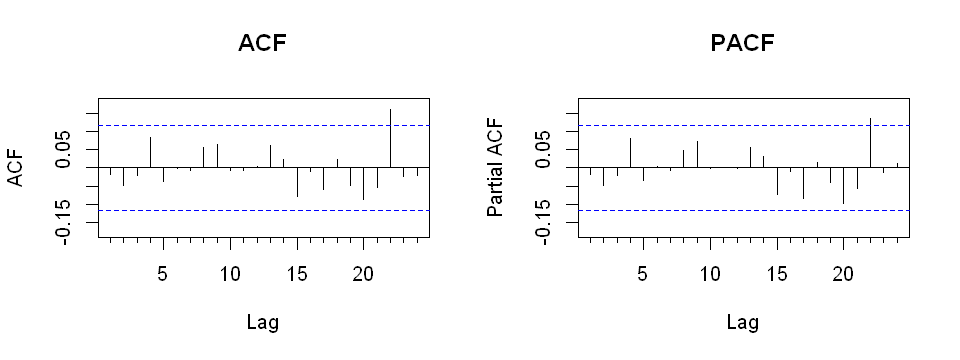

In [29]:
# ACF PACF
par(mfrow = c(1,2))
Acf(returns, main = "ACF")
Pacf(returns, main = "PACF")

In [30]:
# testing stationarity:
adf.test(data)
adf.test(returns)


	Augmented Dickey-Fuller Test

data:  data
Dickey-Fuller = -1.7356, Lag order = 6, p-value = 0.6876
alternative hypothesis: stationary


Warning message in adf.test(returns):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  returns
Dickey-Fuller = -6.5031, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


In [31]:
kpss.test(data)
kpss.test(returns)

Warning message in kpss.test(data):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  data
KPSS Level = 0.78512, Truncation lag parameter = 5, p-value = 0.01


Warning message in kpss.test(returns):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  returns
KPSS Level = 0.27032, Truncation lag parameter = 5, p-value = 0.1


In [27]:
# conclusion - prices are not stationary, log returns are stationary